# Analyse du jeu de données `caracteristiques-2021.csv`

Ce notebook examine le jeu de données `caracteristiques-2021.csv`. Nous allons explorer la structure des données, identifier les problèmes tels que les valeurs manquantes et les valeurs aberrantes, et générer des statistiques descriptives et des visualisations pour mieux comprendre le jeu de données.

## Table des matières
1. [Importation des bibliothèques](#importation-des-bibliothèques)
2. [Chargement des données](#chargement-des-données)
3. [Examen des données](#examen-des-données)
4. [Identification des valeurs manquantes](#identification-des-valeurs-manquantes)
5. [Statis descriptives](#Statis-descriptives)
6. [Identification des valeurs aberrantes](#identification-des-valeurs-aberrantes)
7. [Visualisation des données](#visualisation-des-données)
8. [Conclusion](#conclusion)

## 1. Importation des bibliothèques



In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

#options de visualisation
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 2. Chargement des données

In [2]:
directory_path = os.path.dirname(os.path.abspath('')) 

file_path = os.path.join(directory_path, 'data', 'carcteristiques-2021.csv')
caracteristiques_df = pd.read_csv(file_path)

caracteristiques_df.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000"
1,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000"
2,202100000003,15,7,2021,07:55,1,85,85048,2,1,7,6,15 rue François Nicolas,"46,9219500000","-0,9644600000"
3,202100000004,27,3,2021,19:45,5,93,93005,2,2,3,6,Route de Mitry,"48,9493634583","2,5196639908"
4,202100000005,25,2,2021,07:20,5,76,76429,2,1,1,2,PARIS. ROUTE DE,"49,4083800000","1,1458100000"


## 3. Examen des données


In [3]:
caracteristiques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56518 entries, 0 to 56517
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  56518 non-null  int64 
 1   jour     56518 non-null  int64 
 2   mois     56518 non-null  int64 
 3   an       56518 non-null  int64 
 4   hrmn     56518 non-null  object
 5   lum      56518 non-null  int64 
 6   dep      56518 non-null  object
 7   com      56518 non-null  object
 8   agg      56518 non-null  int64 
 9   int      56518 non-null  int64 
 10  atm      56518 non-null  int64 
 11  col      56518 non-null  int64 
 12  adr      55945 non-null  object
 13  lat      56518 non-null  object
 14  long     56518 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.5+ MB


## 4. Identification des valeurs manquantes

In [4]:
# Identifier les valeurs manquantes
missing_values = caracteristiques_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

adr    573
dtype: int64

In [5]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(caracteristiques_df)) * 100
missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
missing_data

,Valeurs manquantes,Pourcentage
adr,573,1.013836


La colonne adresse a 573 valeurs manquantes

## 5. Statistiques descriptives

In [6]:
descriptive_stats = caracteristiques_df.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Num_Acc,56518.0,2.021000e+11,16315.485594,2.021000e+11,2.021000e+11,2.021000e+11,2.021000e+11,2.021001e+11
jour,56518.0,1.576439e+01,8.794004,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
mois,56518.0,6.867087e+00,3.295277,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
an,56518.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
lum,56518.0,1.835398e+00,1.437602,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
agg,56518.0,1.642574e+00,0.479246,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
int,56518.0,2.077374e+00,2.020099,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
atm,56518.0,1.623642e+00,1.707091,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
col,56518.0,4.004600e+00,1.962765,-1.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00


In [7]:
# Statistiques pour les colonnes catégorielles
categorical_columns = caracteristiques_df.select_dtypes(include=['object']).columns
categorical_stats = caracteristiques_df[categorical_columns].describe().transpose()
categorical_stats

,count,unique,top,freq
hrmn,56518,1374,18:00,769
dep,56518,107,75,5069
com,56518,11150,75116,507
adr,55945,29668,AUTOROUTE A86,351
lat,56518,54618,"-17,5845220000",11
long,56518,54921,"-149,5685780000",11


## 6. Identification des valeurs aberrantes

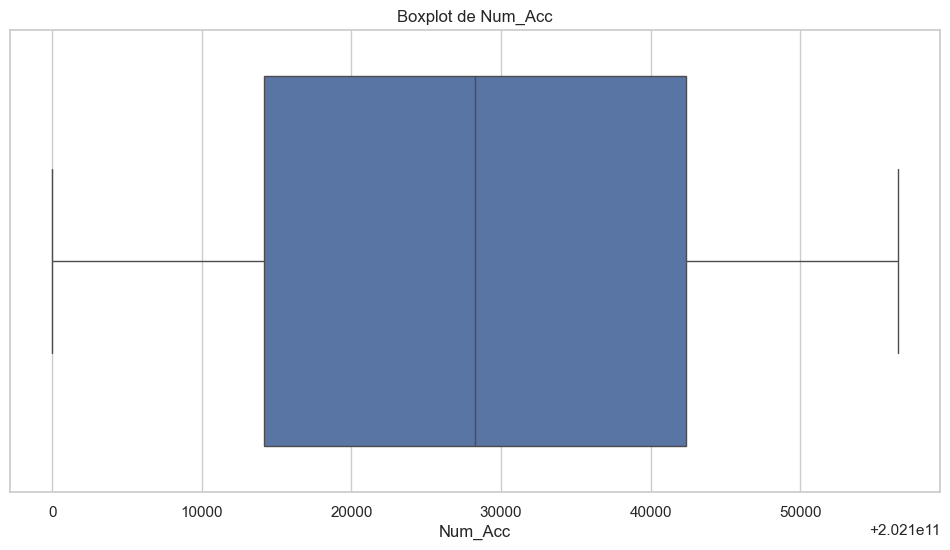

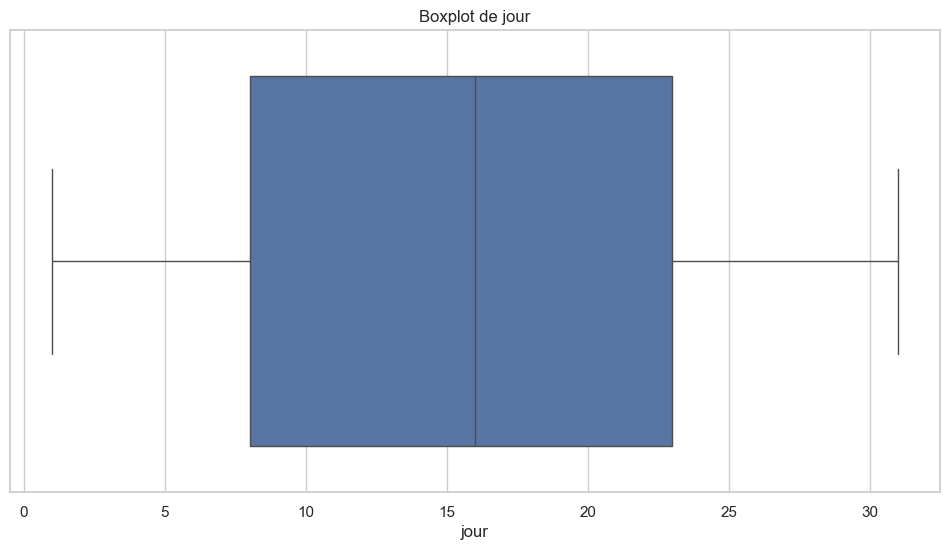

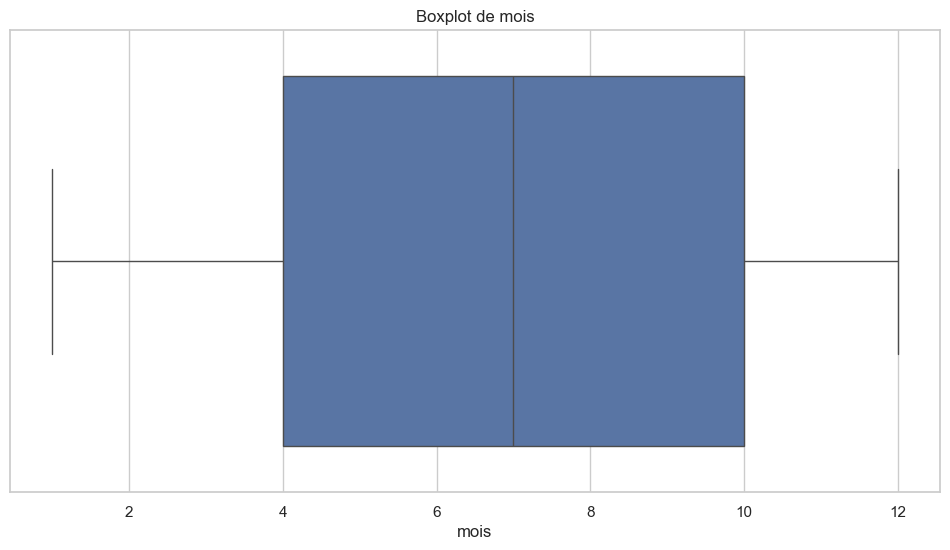

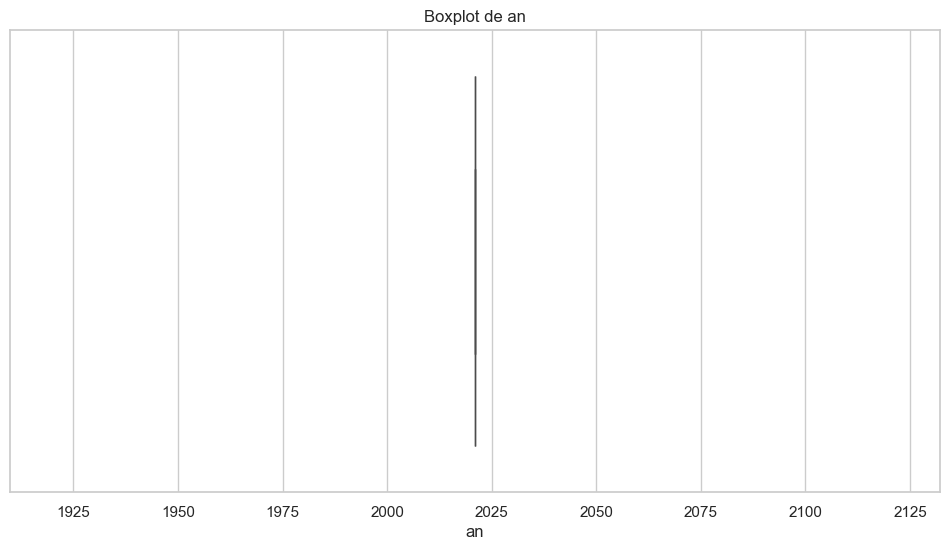

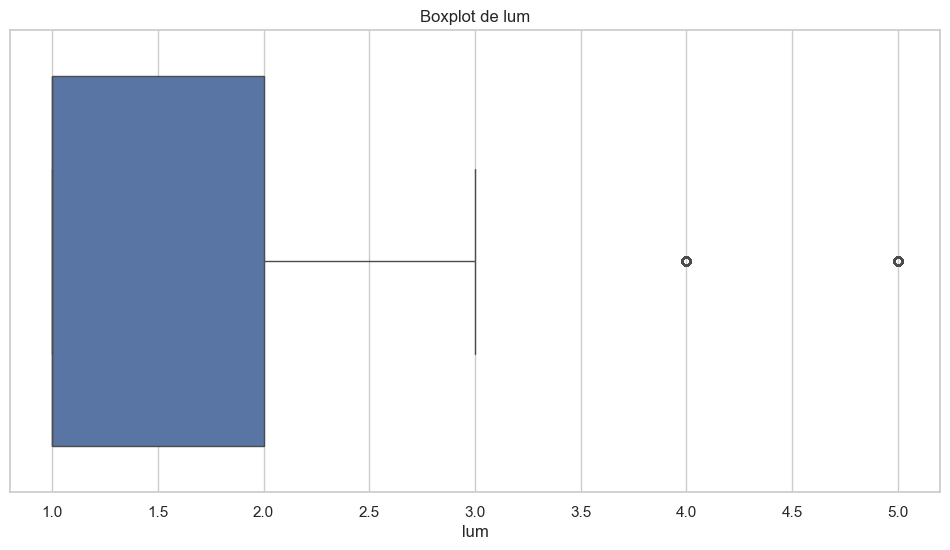

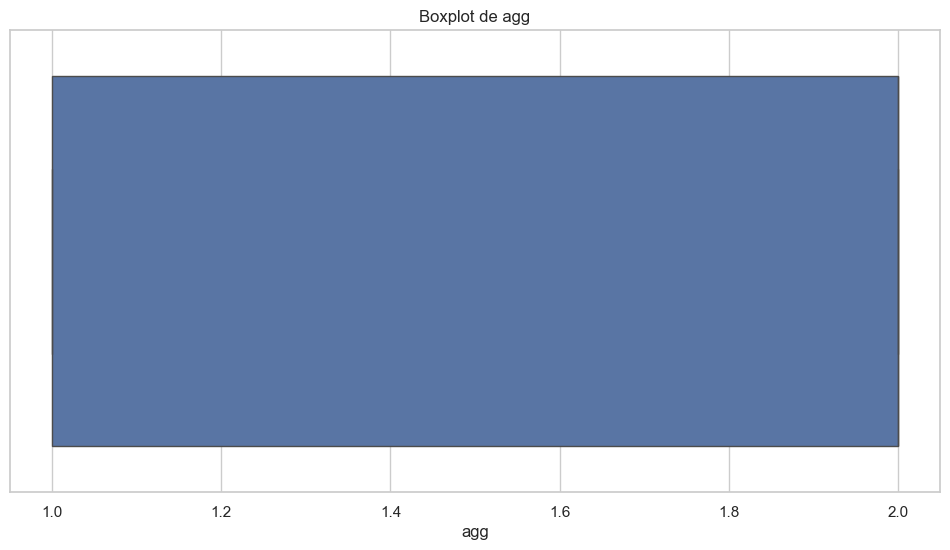

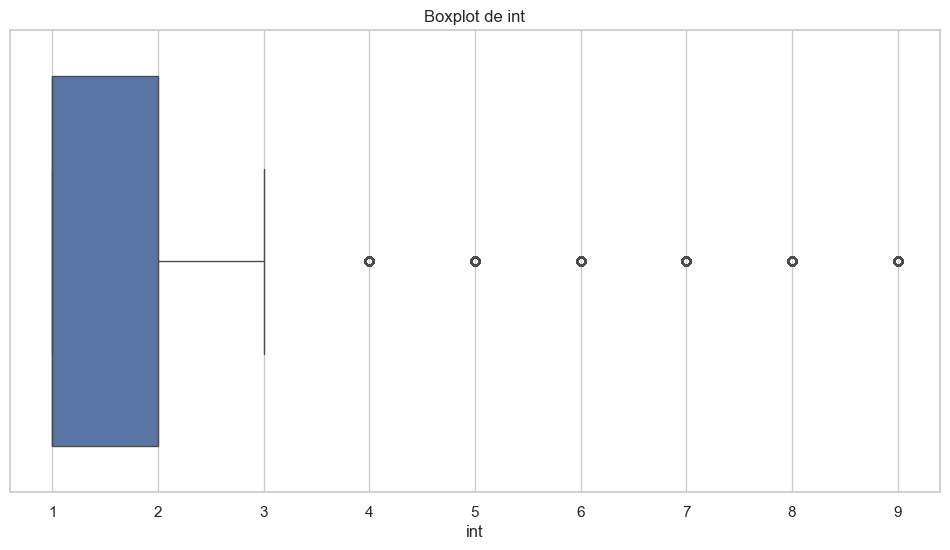

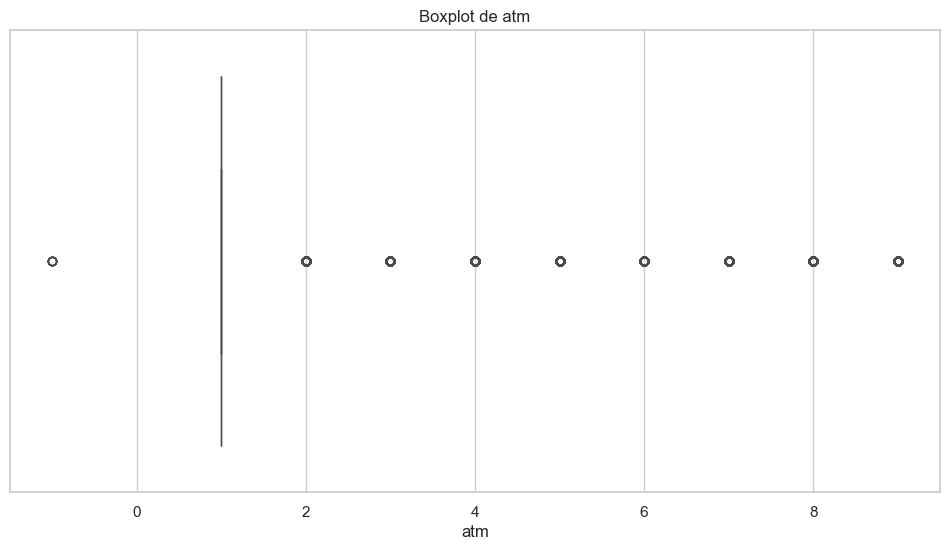

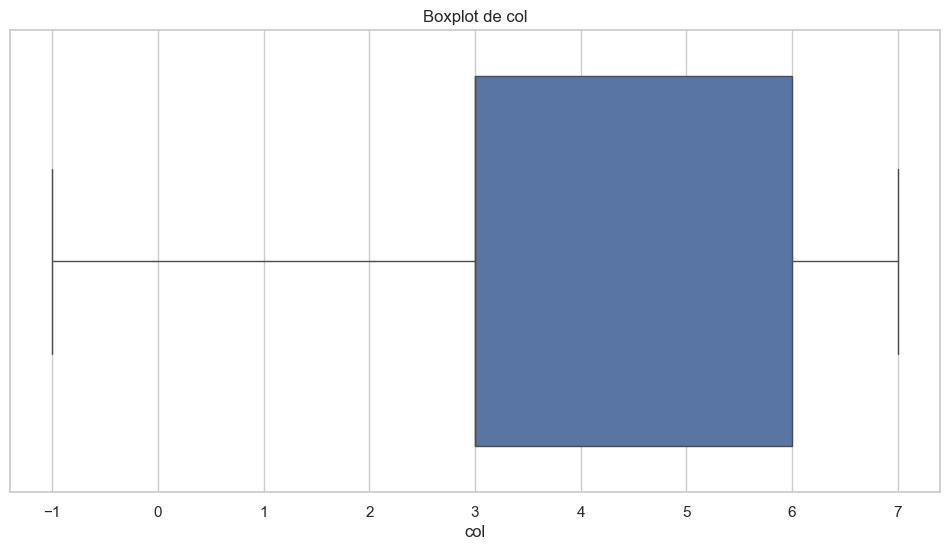

In [8]:
# plot des boxplots pour identifier les valeurs aberrantes dans les colonnes numériques
numeric_columns = caracteristiques_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=caracteristiques_df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [9]:
# Calculer les scores Z pour les colonnes numériques pour identifier les valeurs aberrantes
z_scores = np.abs((caracteristiques_df[numeric_columns] - caracteristiques_df[numeric_columns].mean()) / caracteristiques_df[numeric_columns].std())
outliers = (z_scores > 3).sum()
outliers

Num_Acc       0
jour          0
mois          0
an            0
lum           0
agg           0
int        2511
atm        3530
col           0
dtype: int64

int (Type d'intersection) : 2511 valeurs aberrantes ||
atm (Conditions atmosphériques) : 3530 valeurs aberrantes

## 7. Visualisation des données

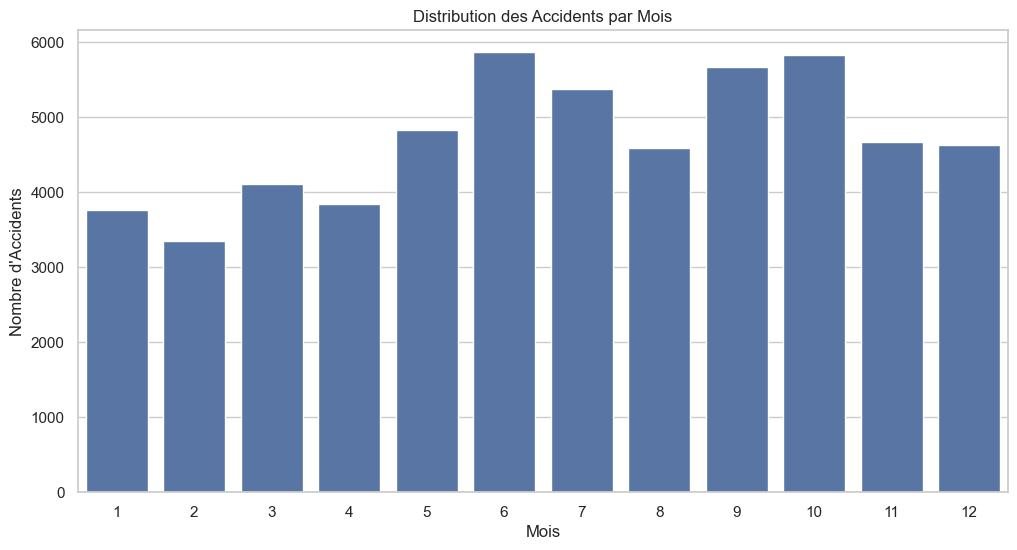

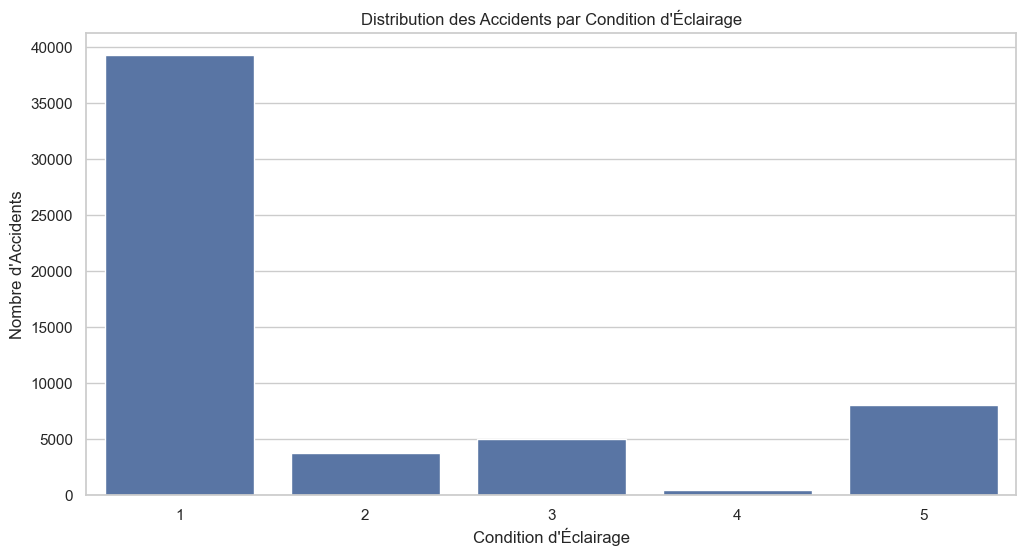

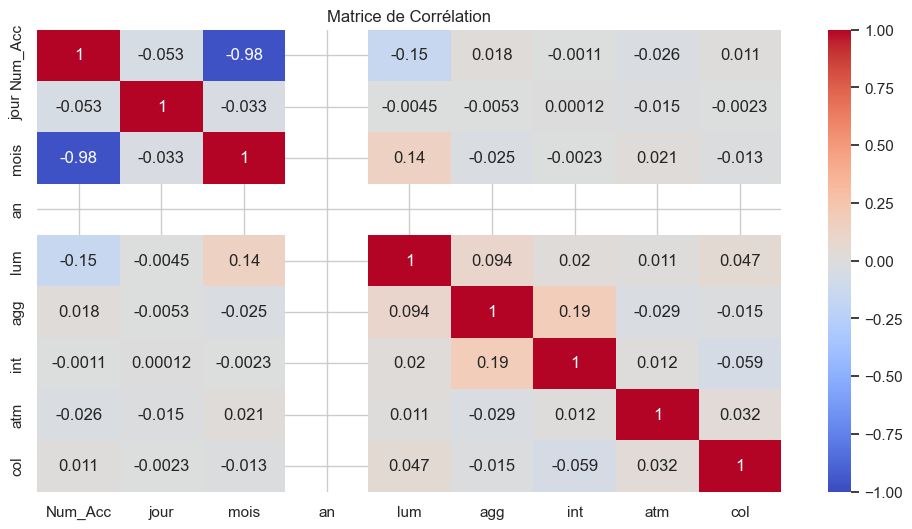

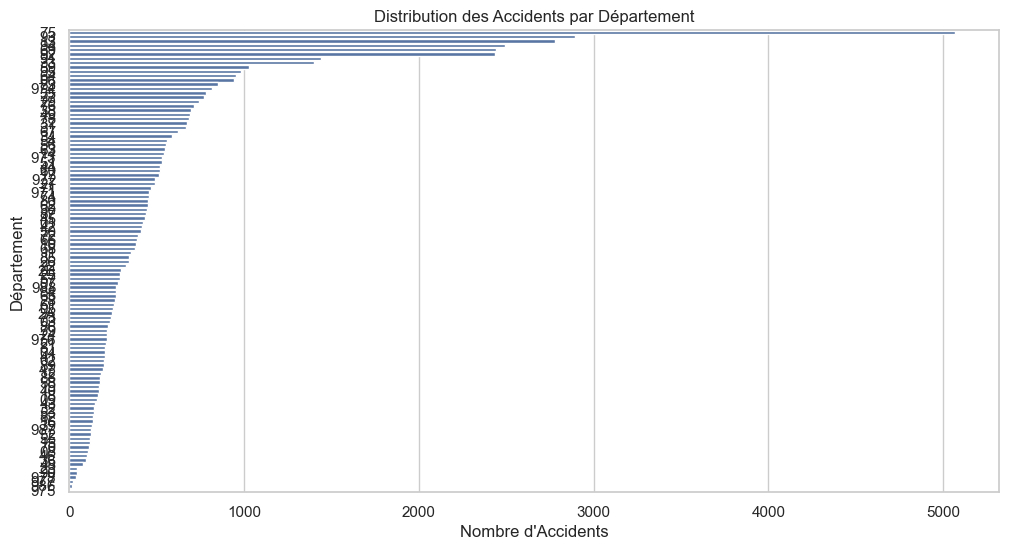

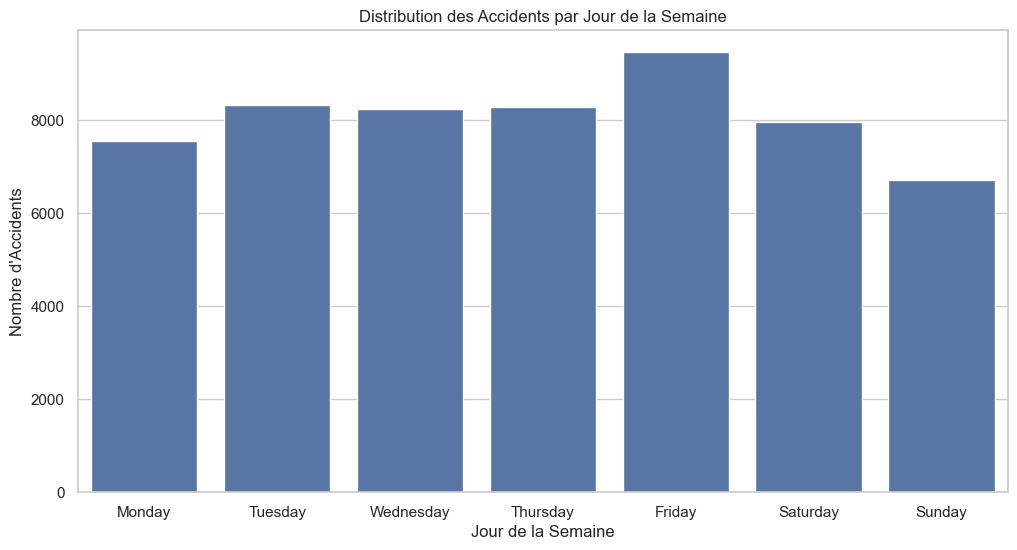

In [10]:
# Distribution des accidents par mois
plt.figure()
sns.countplot(x='mois', data=caracteristiques_df)
plt.title('Distribution des Accidents par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'Accidents')
plt.show()

# Distribution des accidents par condition d'éclairage
plt.figure()
sns.countplot(x='lum', data=caracteristiques_df)
plt.title('Distribution des Accidents par Condition d\'Éclairage')
plt.xlabel('Condition d\'Éclairage')
plt.ylabel('Nombre d\'Accidents')
plt.show()

# Sélectionner uniquement les colonnes numériques
numeric_df = caracteristiques_df.select_dtypes(include=[np.number])

# Heatmap des corrélations entre les colonnes numériques
plt.figure()
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

# Distribution des accidents par département
plt.figure()
sns.countplot(y='dep', data=caracteristiques_df, order=caracteristiques_df['dep'].value_counts().index)
plt.title('Distribution des Accidents par Département')
plt.xlabel('Nombre d\'Accidents')
plt.ylabel('Département')
plt.show()

caracteristiques_df['date'] = pd.to_datetime(caracteristiques_df[['an', 'mois', 'jour']].astype(str).agg('-'.join, axis=1), errors='coerce', format='%Y-%m-%d')
caracteristiques_df['jour_semaine'] = caracteristiques_df['date'].dt.day_name()

# Distribution des accidents par jour de la semaine
plt.figure()
sns.countplot(x='jour_semaine', data=caracteristiques_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution des Accidents par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Nombre d\'Accidents')
plt.show()


Distribution des accidents par mois :

Les accidents sont répartis de manière relativement uniforme tout au long de l'année, avec des pics visibles en juillet et août.

Distribution des accidents par condition d'éclairage :

La majorité des accidents se produisent en plein jour (condition d'éclairage 1). Un nombre important d'accidents se produit également la nuit avec éclairage public allumé (condition d'éclairage 5).

Heatmap des corrélations entre les colonnes numériques :

La matrice de corrélation montre les relations entre les différentes colonnes numériques. Les corrélations ne sont pas très fortes, indiquant que les variables sont relativement indépendantes les unes des autres.

Distribution des accidents par département :

Paris (département 75) et les départements voisins comme 93, 92, et 94 ont un nombre élevé d'accidents. Cela peut être dû à la densité de la population et du trafic dans ces régions.

Distribution des accidents par jour de la semaine :

Les accidents sont plus fréquents les vendredis et les samedis. Cela peut être dû à une augmentation du trafic en fin de semaine et à des comportements plus risqués (ex. sorties nocturnes).